In [1]:
# Libraries we need
import sympy
import sympy.vector
from einsteinpy.geodesic import Geodesic
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor, RicciScalar, RicciTensor, tensor, EinsteinTensor
from numpy import linspace
import matplotlib.pyplot as mpl
from scipy.integrate import odeint


# Makes the output look nice
sympy.init_printing()

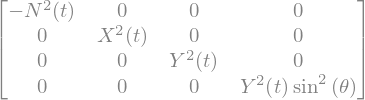

In [2]:
# Defining the coordinate variables as symbols
syms = sympy.symbols('t r theta phi')

# Defining the metric functions as symbolic functions of r and t
N = sympy.Function('N')(syms[0])
X = sympy.Function('X')(syms[0])
Y = sympy.Function('Y')(syms[0])

# Defining the metric to be 4x4
metric = [[0 for i in range(4)] for i in range(4)]

# Defining the components of the metric
metric[0][0] = -N**2
metric[1][1] = X**2
metric[2][2] = Y**2
metric[3][3] = ((Y)**2)*(sympy.sin(syms[2]))**2


# Creating the metric object
m_obj = MetricTensor(metric, syms)
m_obj.tensor()

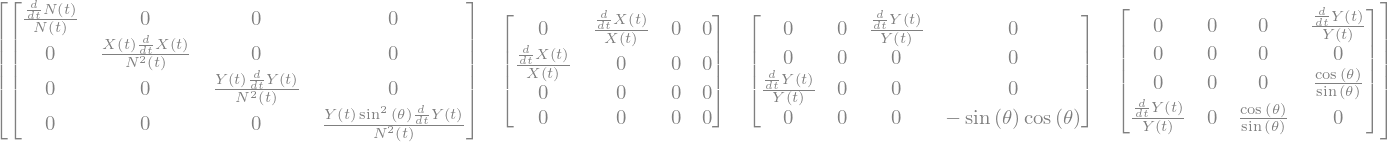

In [3]:
# Computing the Christoffel symbols of the metric
ch = ChristoffelSymbols.from_metric(m_obj)

# Printing the values of the Christoffel symbols in tensor form
ch.tensor()

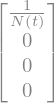

In [4]:
#U vector

U = sympy.Array([1/N,0,0,0])
sympy.Matrix(U)


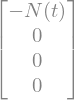

In [5]:
# Finding U lower mu and U lower nu

U_Lmu =  sympy.Matrix(metric) * sympy.Matrix(U)
U_Lnu = sympy.Transpose(U_Lmu)



U_Lmu

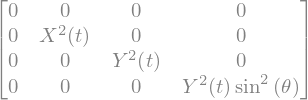

In [6]:
# Finding transverse Metric

h = sympy.Matrix(metric) + U_Lmu*U_Lnu
h

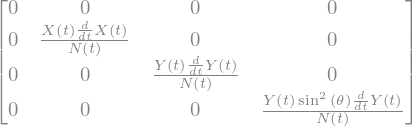

In [7]:
#Computing the elements of B

B = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        B[j][i] = sympy.diff(U_Lmu[j],syms[i]) - (ch[0][i][j])*U_Lmu[0] - (ch[1][i][j])*U_Lmu[1] - \
        (ch[2][i][j])*U_Lmu[2] - (ch[3][i][j])*U_Lmu[3]


sympy.Matrix(B)
#B[0][0]=sympy.diff(U_Lmu[0],syms[0]) -(ch[0][0][0])*U_Lmu[0] - (ch[1][0][0])*U_Lmu[1] - (ch[2][0][0])*U_Lmu[2] - (ch[3][0][0])*U_Lmu[3]
#B[0][1]=sympy.diff(U_Lmu[0],syms[1]) -(ch[0][1][0])*U_Lmu[0] - (ch[1][1][0])*U_Lmu[1] - (ch[2][1][0])*U_Lmu[2] - (ch[3][1][0])*U_Lmu[3]
#B[0][2]=sympy.diff(U_Lmu[0],syms[2]) -(ch[0][2][0])*U_Lmu[0] - (ch[1][2][0])*U_Lmu[1] - (ch[2][2][0])*U_Lmu[2] - (ch[3][2][0])*U_Lmu[3]
#B[0][3]=sympy.diff(U_Lmu[0],syms[3]) -(ch[0][3][0])*U_Lmu[0] - (ch[1][3][0])*U_Lmu[1] - (ch[2][3][0])*U_Lmu[2] - (ch[3][3][0])*U_Lmu[3]
#B[1][0]=sympy.diff(U_Lmu[1],syms[0]) -(ch[0][0][1])*U_Lmu[0] - (ch[1][0][1])*U_Lmu[1] - (ch[2][0][1])*U_Lmu[2] - (ch[3][0][1])*U_Lmu[3]
#B[1][1]=sympy.diff(U_Lmu[1],syms[1]) -(ch[0][1][1])*U_Lmu[0] - (ch[1][1][1])*U_Lmu[1] - (ch[2][1][1])*U_Lmu[2] - (ch[3][1][1])*U_Lmu[3]
#B[1][2]=sympy.diff(U_Lmu[1],syms[2]) -(ch[0][2][1])*U_Lmu[0] - (ch[1][2][1])*U_Lmu[1] - (ch[2][2][1])*U_Lmu[2] - (ch[3][2][1])*U_Lmu[3]
#B[1][3]=sympy.diff(U_Lmu[1],syms[3]) -(ch[0][3][1])*U_Lmu[0] - (ch[1][3][1])*U_Lmu[1] - (ch[2][3][1])*U_Lmu[2] - (ch[3][3][1])*U_Lmu[3]
#B[2][0]=sympy.diff(U_Lmu[2],syms[0]) -(ch[0][0][2])*U_Lmu[0] - (ch[1][0][2])*U_Lmu[1] - (ch[2][0][2])*U_Lmu[2] - (ch[3][0][2])*U_Lmu[3]
#B[2][1]=sympy.diff(U_Lmu[2],syms[1]) -(ch[0][1][2])*U_Lmu[0] - (ch[1][1][2])*U_Lmu[1] - (ch[2][1][2])*U_Lmu[2] - (ch[3][1][2])*U_Lmu[3]
#B[2][2]=sympy.diff(U_Lmu[2],syms[2]) -(ch[0][2][2])*U_Lmu[0] - (ch[1][2][2])*U_Lmu[1] - (ch[2][2][2])*U_Lmu[2] - (ch[3][2][2])*U_Lmu[3]
#B[2][3]=sympy.diff(U_Lmu[2],syms[3]) -(ch[0][3][2])*U_Lmu[0] - (ch[1][3][2])*U_Lmu[1] - (ch[2][3][2])*U_Lmu[2] - (ch[3][3][2])*U_Lmu[3]
#B[3][0]=sympy.diff(U_Lmu[3],syms[0]) -(ch[0][0][3])*U_Lmu[0] - (ch[1][0][3])*U_Lmu[1] - (ch[2][0][3])*U_Lmu[2] - (ch[3][0][3])*U_Lmu[3]
#B[3][1]=sympy.diff(U_Lmu[3],syms[1]) -(ch[0][1][3])*U_Lmu[0] - (ch[1][1][3])*U_Lmu[1] - (ch[2][1][3])*U_Lmu[2] - (ch[3][1][3])*U_Lmu[3]
#B[3][2]=sympy.diff(U_Lmu[3],syms[2]) -(ch[0][2][3])*U_Lmu[0] - (ch[1][2][3])*U_Lmu[1] - (ch[2][2][3])*U_Lmu[2] - (ch[3][2][3])*U_Lmu[3]
#B[3][3]=sympy.diff(U_Lmu[3],syms[3]) -(ch[0][3][3])*U_Lmu[0] - (ch[1][3][3])*U_Lmu[1] - (ch[2][3][3])*U_Lmu[2] - (ch[3][3][3])*U_Lmu[3]

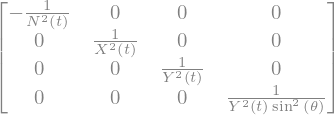

In [8]:
#Inverse metric tensor

Inverse=m_obj.inv()
Inverse.tensor()

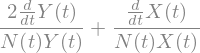

In [9]:
#Creating expansions scalar and solving it component wise

theta = 0
for i in range(4):
    for j in range(4):
        theta +=  Inverse[i][j]*B[i][j]

theta

#theta = Inverse[0][0]*B[0][0] + Inverse[1][0]*B[1][0] + Inverse[2][0]*B[2][0] + Inverse[3][0]*B[3][0] + \
#        Inverse[0][1]*B[0][1] + Inverse[1][1]*B[1][1] + Inverse[2][1]*B[2][1] + Inverse[3][1]*B[3][1] + \
#        Inverse[0][2]*B[0][2] + Inverse[1][2]*B[1][2] + Inverse[2][2]*B[2][2] + Inverse[3][2]*B[3][2] + \
#        Inverse[0][3]*B[0][3] + Inverse[1][3]*B[1][3] + Inverse[2][3]*B[2][3] + Inverse[3][3]*B[3][3]




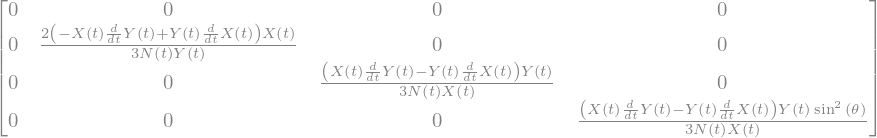

In [10]:
# Finding Shear Tensor

sigma = (sympy.Matrix(B) + sympy.Transpose(sympy.Matrix(B)))/2 - (h*theta)/3
sympy.simplify(sigma)


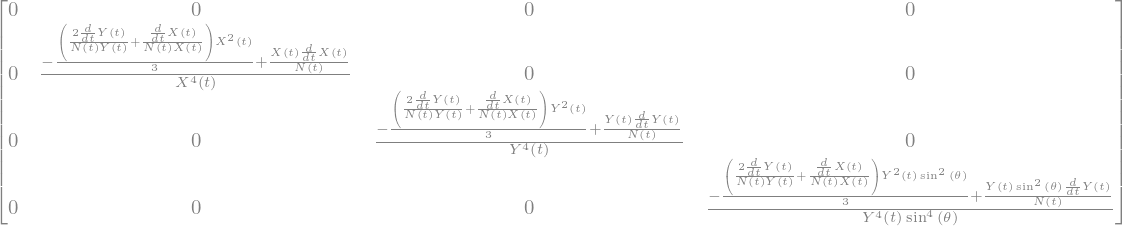

In [11]:
# Finding sigma Upper
sigma_U = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        for k in range(4):
            sigma_U[j][i] += Inverse[i][k]*Inverse[j][k]*sigma[k,k]

sympy.Matrix(sigma_U)
#sigma_U[0][0] = Inverse[0][0]*Inverse[0][0]*sigma[0,0] + Inverse[0][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[0][2]*sigma[2,2] + Inverse[0][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[0][1] = Inverse[0][0]*Inverse[1][0]*sigma[0,0] + Inverse[0][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[1][2]*sigma[2,2] + Inverse[0][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[0][2] = Inverse[0][0]*Inverse[2][0]*sigma[0,0] + Inverse[0][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[2][2]*sigma[2,2] + Inverse[0][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[0][3] = Inverse[0][0]*Inverse[3][0]*sigma[0,0] + Inverse[0][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[0][2]*Inverse[3][2]*sigma[2,2] + Inverse[0][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[1][0] = Inverse[1][0]*Inverse[0][0]*sigma[0,0] + Inverse[1][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[0][2]*sigma[2,2] + Inverse[1][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[1][1] = Inverse[1][0]*Inverse[1][0]*sigma[0,0] + Inverse[1][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[1][2]*sigma[2,2] + Inverse[1][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[1][2] = Inverse[1][0]*Inverse[2][0]*sigma[0,0] + Inverse[1][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[2][2]*sigma[2,2] + Inverse[1][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[1][3] = Inverse[1][0]*Inverse[3][0]*sigma[0,0] + Inverse[1][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[1][2]*Inverse[3][2]*sigma[2,2] + Inverse[1][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[2][0] = Inverse[2][0]*Inverse[0][0]*sigma[0,0] + Inverse[2][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[0][2]*sigma[2,2] + Inverse[2][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[2][1] = Inverse[2][0]*Inverse[1][0]*sigma[0,0] + Inverse[2][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[1][2]*sigma[2,2] + Inverse[2][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[2][2] = Inverse[2][0]*Inverse[2][0]*sigma[0,0] + Inverse[2][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[2][2]*sigma[2,2] + Inverse[2][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[2][3] = Inverse[2][0]*Inverse[3][0]*sigma[0,0] + Inverse[2][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[2][2]*Inverse[3][2]*sigma[2,2] + Inverse[2][3]*Inverse[3][3]*sigma[3,3]

#sigma_U[3][0] = Inverse[3][0]*Inverse[0][0]*sigma[0,0] + Inverse[3][1]*Inverse[0][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[0][2]*sigma[2,2] + Inverse[3][3]*Inverse[0][3]*sigma[3,3]
#sigma_U[3][1] = Inverse[3][0]*Inverse[1][0]*sigma[0,0] + Inverse[3][1]*Inverse[1][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[1][2]*sigma[2,2] + Inverse[3][3]*Inverse[1][3]*sigma[3,3]
#sigma_U[3][2] = Inverse[3][0]*Inverse[2][0]*sigma[0,0] + Inverse[3][1]*Inverse[2][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[2][2]*sigma[2,2] + Inverse[3][3]*Inverse[2][3]*sigma[3,3]
#sigma_U[3][3] = Inverse[3][0]*Inverse[3][0]*sigma[0,0] + Inverse[3][1]*Inverse[3][1]*sigma[1,1] + \
#                Inverse[3][2]*Inverse[3][2]*sigma[2,2] + Inverse[3][3]*Inverse[3][3]*sigma[3,3]


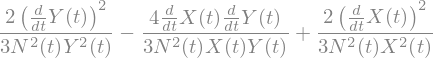

In [12]:
# Computing shear

sigma2 = 0
for i in range(4):
    for j in range(4):
        sigma2 += sigma[j,i]*sigma_U[j][i]

sympy.expand(sigma2)

#sigma2 = sigma[0,0]*sigma_U[0][0] + sigma[0,1]*sigma_U[0][1] + sigma[0,2]*sigma_U[0][2] + sigma[0,3]*sigma_U[0][3] + \
#         sigma[1,0]*sigma_U[1][0] + sigma[1,1]*sigma_U[1][1] + sigma[1,2]*sigma_U[1][2] + sigma[1,3]*sigma_U[1][3] + \
#         sigma[2,0]*sigma_U[2][0] + sigma[2,1]*sigma_U[2][1] + sigma[2,2]*sigma_U[2][2] + sigma[2,3]*sigma_U[2][3] + \
#         sigma[3,0]*sigma_U[3][0] + sigma[3,1]*sigma_U[3][1] + sigma[3,2]*sigma_U[3][2] + sigma[3,3]*sigma_U[3][3]


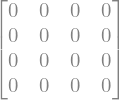

In [13]:
# Computing Omega

omega = (sympy.Matrix(B) - sympy.Transpose(sympy.Matrix(B)))/2
omega

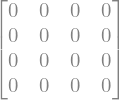

In [14]:
#Computing omega upper

omega_U = [[0 for i in range(4)] for i in range(4)]

for i in range(4):
    for j in range(4):
        for k in range(4):
            omega_U[i][j] += Inverse[i][k]*Inverse[j][k]*omega[k,k]
            
sympy.Matrix(omega_U)
    
#omega_U[0][0] = Inverse[0][0]*Inverse[0][0]*omega[0,0] + Inverse[0][1]*Inverse[0][1]*omega[1,1] + Inverse[0][2]*Inverse[0][2]*omega[2,2] + Inverse[0][3]*Inverse[0][3]*omega[3,3]
#omega_U[1][0] = Inverse[1][0]*Inverse[0][0]*omega[0,0] + Inverse[1][1]*Inverse[0][1]*omega[1,1] + Inverse[1][2]*Inverse[0][2]*omega[2,2] + Inverse[1][3]*Inverse[0][3]*omega[3,3]
#omega_U[2][0] = Inverse[2][0]*Inverse[0][0]*omega[0,0] + Inverse[2][1]*Inverse[0][1]*omega[1,1] + Inverse[2][2]*Inverse[0][2]*omega[2,2] + Inverse[2][3]*Inverse[0][3]*omega[3,3]
#omega_U[3][0] = Inverse[3][0]*Inverse[0][0]*omega[0,0] + Inverse[3][1]*Inverse[0][1]*omega[1,1] + Inverse[3][2]*Inverse[0][2]*omega[2,2] + Inverse[3][3]*Inverse[0][3]*omega[3,3]

#omega_U[0][1] = Inverse[0][0]*Inverse[1][0]*omega[0,0] + Inverse[0][1]*Inverse[1][1]*omega[1,1] + Inverse[0][2]*Inverse[1][2]*omega[2,2] + Inverse[0][3]*Inverse[1][3]*omega[3,3]
#omega_U[1][1] = Inverse[1][0]*Inverse[1][0]*omega[0,0] + Inverse[1][1]*Inverse[1][1]*omega[1,1] + Inverse[1][2]*Inverse[1][2]*omega[2,2] + Inverse[1][3]*Inverse[1][3]*omega[3,3]
#omega_U[2][1] = Inverse[2][0]*Inverse[1][0]*omega[0,0] + Inverse[2][1]*Inverse[1][1]*omega[1,1] + Inverse[2][2]*Inverse[1][2]*omega[2,2] + Inverse[2][3]*Inverse[1][3]*omega[3,3]
#omega_U[3][1] = Inverse[3][0]*Inverse[1][0]*omega[0,0] + Inverse[3][1]*Inverse[1][1]*omega[1,1] + Inverse[3][2]*Inverse[1][2]*omega[2,2] + Inverse[3][3]*Inverse[1][3]*omega[3,3]

#omega_U[0][2] = Inverse[0][0]*Inverse[2][0]*omega[0,0] + Inverse[0][1]*Inverse[2][1]*omega[1,1] + Inverse[0][2]*Inverse[2][2]*omega[2,2] + Inverse[0][3]*Inverse[2][3]*omega[3,3]
#omega_U[1][2] = Inverse[1][0]*Inverse[2][0]*omega[0,0] + Inverse[1][1]*Inverse[2][1]*omega[1,1] + Inverse[1][2]*Inverse[2][2]*omega[2,2] + Inverse[1][3]*Inverse[2][3]*omega[3,3]
#omega_U[2][2] = Inverse[2][0]*Inverse[2][0]*omega[0,0] + Inverse[2][1]*Inverse[2][1]*omega[1,1] + Inverse[2][2]*Inverse[2][2]*omega[2,2] + Inverse[2][3]*Inverse[2][3]*omega[3,3]
#omega_U[3][2] = Inverse[3][0]*Inverse[2][0]*omega[0,0] + Inverse[3][1]*Inverse[2][1]*omega[1,1] + Inverse[3][2]*Inverse[2][2]*omega[2,2] + Inverse[3][3]*Inverse[2][3]*omega[3,3]

#omega_U[0][3] = Inverse[0][0]*Inverse[3][0]*omega[0,0] + Inverse[0][1]*Inverse[3][1]*omega[1,1] + Inverse[0][2]*Inverse[3][2]*omega[2,2] + Inverse[0][3]*Inverse[3][3]*omega[3,3]
#omega_U[1][3] = Inverse[1][0]*Inverse[3][0]*omega[0,0] + Inverse[1][1]*Inverse[3][1]*omega[1,1] + Inverse[1][2]*Inverse[3][2]*omega[2,2] + Inverse[1][3]*Inverse[3][3]*omega[3,3]
#omega_U[2][3] = Inverse[2][0]*Inverse[3][0]*omega[0,0] + Inverse[2][1]*Inverse[3][1]*omega[1,1] + Inverse[2][2]*Inverse[3][2]*omega[2,2] + Inverse[2][3]*Inverse[3][3]*omega[3,3]
#omega_U[3][3] = Inverse[3][0]*Inverse[3][0]*omega[0,0] + Inverse[3][1]*Inverse[3][1]*omega[1,1] + Inverse[3][2]*Inverse[3][2]*omega[2,2] + Inverse[3][3]*Inverse[3][3]*omega[3,3]

In [15]:
omega2 = 0
for i in range(4):
    for j in range(4):
        omega2 += omega[j,i]*omega_U[j][i]

        

sympy.expand(omega2)

# omega2 =  omega[0,0]*omega_U[0][0] + omega[0,1]*omega_U[0][1] + omega[0,2]*omega_U[0][2] + omega[0,3]*omega_U[0][3] + \
#           omega[1,0]*omega_U[1][0] + omega[1,1]*omega_U[1][1] + omega[1,2]*omega_U[1][2] + omega[1,3]*omega_U[1][3] + \
#           omega[2,0]*omega_U[2][0] + omega[2,1]*omega_U[2][1] + omega[2,2]*omega_U[2][2] + omega[2,3]*omega_U[2][3] + \
#           omega[3,0]*omega_U[3][0] + omega[3,1]*omega_U[3][1] + omega[3,2]*omega_U[3][2] + omega[3,3]*omega_U[3][3]

In [16]:
# Defining the coordinate variables for the effective equations of motions
syms1 = sympy.symbols('tau l G m gamma beta delta_x delta v h_0 alpha h_-1')

# Defining the metric functions as symbolic functions of tau
R = sympy.Function('R')(syms1[0])
PR = sympy.Function('P_R')(syms1[0])
PL = sympy.Function('P_Lamda')(syms1[0])
Lambda = sympy.Function('Lambda')(syms1[0])
l = syms1[1]
G = syms1[2]
m = syms1[3]
gamma = syms1[4]
beta = syms1[5]
deltx = syms1[6]
delt = syms1[7]
v = syms1[8]
h0 = syms1[9]
alpha = syms1[10]
h1 = syms1[11]



In [17]:
# Testing values 
l = 1
G = 1
m = 1
gamma = 1
beta = 1
deltx = 1
delt = 1
v = 1
h0 = 1
alpha = 1
h1 = 1

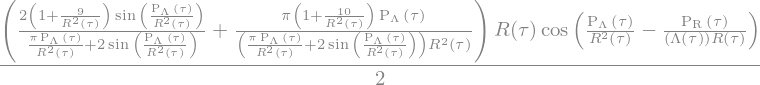

In [18]:
#Computing dR/dtau

#omega = gamma*G*alpha*PL/R**2

dR = R/(2*G*m)*sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*h0)*gamma*G*alpha*PL/R**2)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2))+((1+((l**4)*gamma**2)/((beta**2)*R**2))-\
8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))

dR

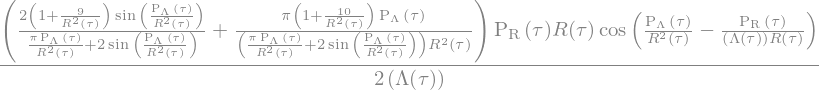

In [19]:
#Computing dPL/dtau

dPL = (R*PR/(2*G*m*Lambda)*(sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*h0)*gamma*G*alpha*\
PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2))+((1+((l**4)*gamma**2)/((beta**2)*R**2))\
-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*((2*sympy.sin(gamma*G*alpha*PL/R**2)/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))))
dPL

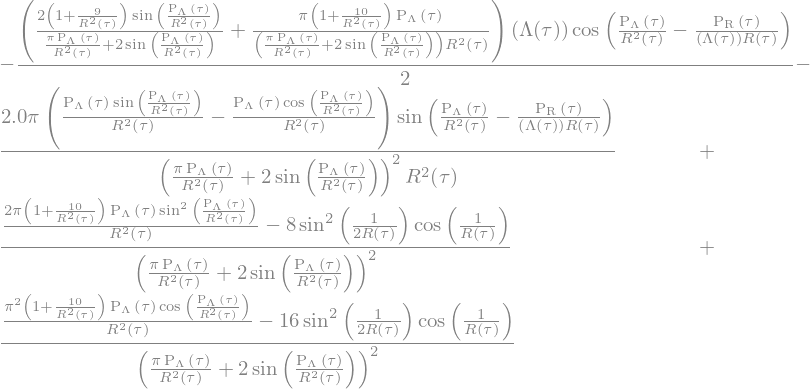

In [20]:
#Computing dLambda/dtau

dLambda = -(Lambda/(2*G*m))*sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))*\
((((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
((((sympy.pi)*h0)*gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2)))) +\
(((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*\
((((2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))))))) +\
((sympy.pi*h1*(gamma*G*alpha*PL/R**2))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
(8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*(sympy.sin(gamma*G*alpha*PL/R**2))**2)-8*gamma**2*sympy.cos(alpha/R)*\
(sympy.sin(alpha/(2*R))**2))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2) +\
((sympy.cos(gamma*G*alpha*PL/R**2))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
(8*(1+v)*l**2*gamma**2/(delt*R**2)))*(sympy.pi)**2*(h0**2)*gamma*G*alpha*PL/R**2 - 16*gamma**2*sympy.cos(alpha/R)*\
(sympy.sin(alpha/(2*R)))**2)/((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2)+\
(((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*(l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-\
PL/R**2)))*((sympy.sin(gamma*G*alpha*PL/R**2)*h1*gamma*G*alpha*PL/R**2)-(sympy.cos(gamma*G*alpha*PL/R**2)*h0*gamma*G*alpha*PL/R**2))/\
(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2

dLambda

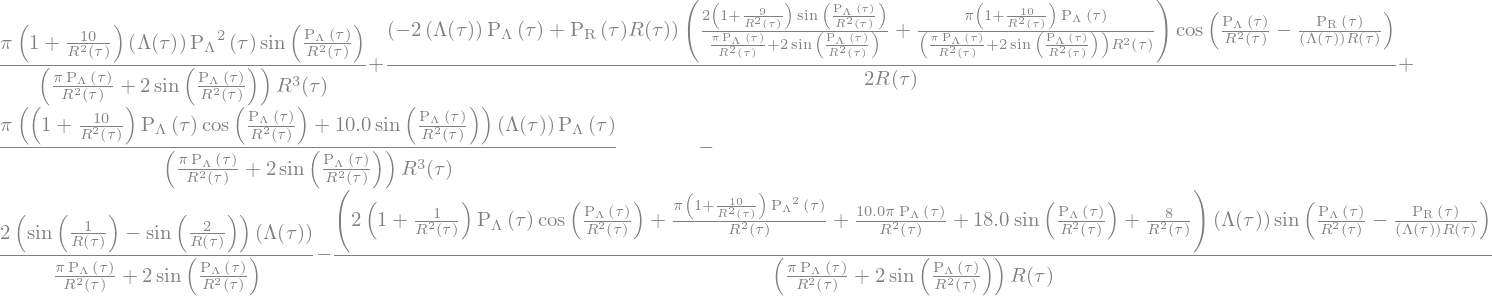

In [21]:
#Computing dPR/dtau

dPR = ((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((((1+((2*l**4)*gamma**2)/\
((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
((sympy.pi*h0*gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))+((1+((l**4)*\
gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
(2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))))+\
((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*h1*(alpha*gamma*G*PL/R**2))/\
(G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
(24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))+((sympy.pi*Lambda*h0*gamma*G*alpha*PL/R**2)/\
((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*((sympy.sin(gamma*G*alpha*PL/R**2)*\
(2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)))+(G*PL*\
sympy.cos(gamma*G*alpha*PL/R**2))*(1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
8*gamma**2*l**2*(1+v)/(R**2*delt))) + ((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
(G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*(((G*PL*gamma*G*alpha*PL/R**2*h1*\
sympy.pi*alpha/beta)*(1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/\
(R**2*deltx**2))))+(2*sympy.pi*h0*gamma*G*alpha*PL/R**2)*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/(beta*delt)-4*l**2*\
gamma/(beta*deltx))+(sympy.sin(gamma*G*alpha*PL/R**2))*(2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*l**2*\
gamma/(beta*deltx))+(2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2)*(1+l**4*gamma**2/(R**2*beta**2))+8*l**2*\
gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx))-(2*gamma*Lambda/(G**2*m))*(sympy.sin(alpha/R)-\
sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*(gamma*G*alpha*PL)/R**2)

dPR

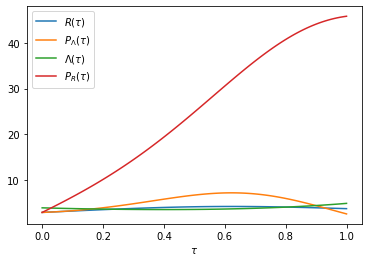

In [22]:
# Numerically solving the equations of motion



def odes(x,tau):
    
    R = x[0]
    PL = x[1]
    Lambda = x[2]
    PR = x[3]
    
    dR = R/(2*G*m)*sympy.cos(gamma*G*beta*((PR/(R*Lambda)) - PL/R**2))*(((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-\
    8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*h0)*gamma*G*alpha*PL/R**2)/\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2))+((1+((l**4)*gamma**2)/((beta**2)*R**2))-\
    8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*(2*sympy.sin(gamma*G*alpha*PL/R**2)/\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))
    
    dPL = (R*PR/(2*G*m*Lambda)*(sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))))*(((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*(((sympy.pi)*h0)*gamma*G*alpha*\
    PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2))+((1+((l**4)*gamma**2)/((beta**2)*R**2))\
    -8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*((2*sympy.sin(gamma*G*alpha*PL/R**2)/\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))))
    
    dLambda = -(Lambda/(2*G*m))*sympy.cos(gamma*G*beta*(PR/(R*Lambda) - PL/R**2))*\
    ((((1+((2*l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
    ((((sympy.pi)*h0)*gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi)*h0*(gamma*G*alpha*PL/R**2)))) +\
    (((1+((l**4)*gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3*v-1)*l**2*gamma**2)/(delt*R**2))*\
    ((((2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))))))) +\
    ((sympy.pi*h1*(gamma*G*alpha*PL/R**2))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(2*(sympy.sin(gamma*G*alpha*PL/R**2))**2)-8*gamma**2*sympy.cos(alpha/R)*\
    (sympy.sin(alpha/(2*R))**2))/((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2) +\
    ((sympy.cos(gamma*G*alpha*PL/R**2))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + (24*l**2*gamma**2)/(deltx*R**2) -\
    (8*(1+v)*l**2*gamma**2/(delt*R**2)))*(sympy.pi)**2*(h0**2)*gamma*G*alpha*PL/R**2 - 16*gamma**2*sympy.cos(alpha/R)*\
    (sympy.sin(alpha/(2*R)))**2)/((2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2)+\
    (((2*sympy.pi*gamma**2*alpha*l**2)/(beta*R**2))*(l**2/beta**2 + (32*(1-v))/delt)*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-\
    PL/R**2)))*((sympy.sin(gamma*G*alpha*PL/R**2)*h1*gamma*G*alpha*PL/R**2)-(sympy.cos(gamma*G*alpha*PL/R**2)*h0*gamma*G*alpha*PL/R**2))/\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)+(sympy.pi*h0*gamma*G*alpha*PL/R**2))**2
    
    dPR = ((R*PR-2*Lambda*PL)/(2*G*m*R) * (sympy.cos(gamma*G*beta*(PR/(R*Lambda)-PL/R**2))))*(((((1+((2*l**4)*gamma**2)/\
    ((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + (8*(3-v)*l**2*gamma**2)/(delt*R**2))*\
    ((sympy.pi*h0*gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2))+((1+((l**4)*\
    gamma**2)/((beta**2)*R**2))-8*(l**2*gamma**2)/(deltx*R**2) + ((8*(3*v-1)*l**2*gamma**2)/(delt*R**2)))*\
    (2*sympy.sin(gamma*G*alpha*PL/R**2)/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))))+\
    ((sympy.pi*Lambda*PL*sympy.sin(alpha*gamma*G*PL/R**2)*h1*(alpha*gamma*G*PL/R**2))/\
    (G*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*(1+(2*l**4*gamma**2)/(alpha**2*R**2) + \
    (24*l**2*gamma**2)/(deltx*R**2) - (8*(1+v)*l**2*gamma**2/(delt*R**2)))+((sympy.pi*Lambda*h0*gamma*G*alpha*PL/R**2)/\
    ((G**2*m*R)*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*((sympy.sin(gamma*G*alpha*PL/R**2)*\
    (2*l**4*gamma/alpha**3 + 24*l**2*gamma/(alpha*deltx)-(8*gamma*l**2*(1+v))/(alpha*delt)))+(G*PL*\
    sympy.cos(gamma*G*alpha*PL/R**2))*(1+2*l**4*gamma**2/((R**2)*alpha**2)+24*l**2*gamma**2/(R**2*deltx)-\
    8*gamma**2*l**2*(1+v)/(R**2*delt))) + (((Lambda*sympy.sin(gamma*G*beta*(PR/(R*Lambda)-PL/R**2)))/\
    (G**2*m*R*(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*gamma*G*alpha*PL/R**2)))*((G*PL*gamma*G*alpha*PL/R**2*h1*\
    sympy.pi*alpha/beta)*(1+2*l**4*gamma**2/(R**2*beta**2)+8*l**2*gamma**2*(3-v)/(R**2*delt)-(8*l**2*gamma**2/\
    (R**2*deltx**2))))+(2*sympy.pi*h0*gamma*G*alpha*PL/R**2)*(l**4*gamma/beta**3 + 4*l**2*gamma*(3-v)/(beta*delt)-4*l**2*\
    gamma/(beta*deltx))+(sympy.sin(gamma*G*alpha*PL/R**2))*(2*l**4*gamma/beta**3+16*l**2*gamma*(3*v-1)/(beta*delt)-16*l**2*\
    gamma/(beta*deltx))+(2*G*PL*alpha/beta)*sympy.cos(gamma*G*alpha*PL/R**2)*((1+l**4*gamma**2/(R**2*beta**2))+8*l**2*\
    gamma**2*(3*v-1)/(R**2*delt)-8*l**2*gamma**2/(R**2*deltx)))-(2*gamma*Lambda/(G**2*m))*(sympy.sin(alpha/R)-\
    sympy.sin(2*alpha/R))/(2*sympy.sin(gamma*G*alpha*PL/R**2)+sympy.pi*h0*(gamma*G*alpha*PL)/R**2)

    return [dR, dPL, dLambda, dPR]

x0 = [3,3,4,3]
    
tau = linspace(0,1,100)
x = odeint(odes,x0,tau)

R = x[:,0]
PL = x[:,1]
Lambda = x[:,2]
PR = x[:,3]

mpl.plot(tau,R,label=r'$R(\tau)$')
mpl.plot(tau,PL,label=r'$P_{\Lambda}(\tau)$')
mpl.plot(tau,Lambda,label=r'$\Lambda(\tau)$')
mpl.plot(tau,PR,label=r'$P_R(\tau)$')
mpl.xlabel(r'$\tau$')
mpl.legend()
mpl.show()


    